In [1]:
from cvm.utils import UnitConvert as uc
from matplotlib import pyplot as plt

from pprint import pprint

from cvm.A1 import Tetrahedron, TetraOctahedron
from cvm.sample import Sample
from cvm.vibration import ClusterVibration

from cvm.utils import parse_formula, mixed_atomic_weight, parse_input_set, UnitConvert, cvm_context
import numpy as np
import pandas as pd

In [2]:
tetra = Tetrahedron.from_input_set('AlMg')
# tetra = Tetrahedron.from_input_set('PdRh')

with cvm_context(simple_print='True'):
    print(tetra)

Tetrahedron:
  | 
  |-meta:
  |   |-host: al
  |   |-impurity: mg
  |   |-prefix: 
  |   |-suffix: vib_to
  |   |-description: almg solubility limit calculation with tetrahedron approximation
  |   |-structure: a1
  |   |-timestamp: 2019-07-06 21:13:45
  | 
  |-tag_800k-<$T_\mathrm{FD}=800$K>-<skip: False>


In [3]:
def patch(_, r0):

    r0 = UnitConvert.ad2lc(r0)
    _1st = -0.071 + (-0.00365 * (r0 - 7.85) / 0.1)
    
    return {'pair1': _1st}

# calcaulation

In [4]:
for status in tetra(sample_paras=dict(energy_patch=patch)):
# for status in tetra():
    print('1st: %.5f eV' % (status.int_energy.pair1))
    print('2nd: %.5f eV' % (status.int_energy.pair2))
    print('triple: %.5f eV' % (status.int_energy.triple))
    print('tetra: %.5f eV' % (status.int_energy.tetra))
    print('T=%6.3f' % status.temperature, 'Concentration=%6.4f%%' % (status.concentration * 100), 'Counts=%s' % status.num_of_ite, '\n')    

1st: -0.04253 eV
2nd: -0.00030 eV
triple: 0.00527 eV
tetra: 0.00125 eV
T=400.000 Concentration=50.0000% Counts=73 

1st: -0.04851 eV
2nd: -0.00211 eV
triple: 0.00495 eV
tetra: 0.00132 eV
T=677.420 Concentration=50.0000% Counts=33 

1st: -0.05076 eV
2nd: -0.00278 eV
triple: 0.00484 eV
tetra: 0.00136 eV
T=775.620 Concentration=50.0000% Counts=34 

1st: -0.05221 eV
2nd: -0.00320 eV
triple: 0.00478 eV
tetra: 0.00139 eV
T=836.743 Concentration=50.0000% Counts=36 

1st: -0.05328 eV
2nd: -0.00352 eV
triple: 0.00473 eV
tetra: 0.00141 eV
T=881.234 Concentration=50.0000% Counts=37 

1st: -0.05414 eV
2nd: -0.00377 eV
triple: 0.00469 eV
tetra: 0.00143 eV
T=916.235 Concentration=50.0000% Counts=37 

1st: -0.05485 eV
2nd: -0.00398 eV
triple: 0.00466 eV
tetra: 0.00145 eV
T=945.092 Concentration=50.0000% Counts=38 

1st: -0.05547 eV
2nd: -0.00416 eV
triple: 0.00464 eV
tetra: 0.00146 eV
T=969.642 Concentration=50.0000% Counts=38 

1st: -0.05601 eV
2nd: -0.00431 eV
triple: 0.00462 eV
tetra: 0.00147 eV
T

In [39]:
tetra.results.tag_800k.head()

,temperature,concentration,num_of_ite,pair1,pair2,triple,tetra
0,400.0,0.001524,1,-0.031811,-0.000847,0.007905,0.002542
1,400.0,0.002206,2,-0.031832,-0.000845,0.007903,0.002541
2,400.0,0.003056,3,-0.031860,-0.000843,0.007900,0.002539
3,400.0,0.004072,4,-0.031894,-0.000841,0.007896,0.002537
4,400.0,0.005244,5,-0.031935,-0.000838,0.007891,0.002535


In [40]:
ret = tetra.results.tag_800k.groupby('temperature')['concentration'].max()

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def percent(x, pos=0):
    return u'{:3.1f}'.format(100 * x)


def process(meta, *results, experiment=None):    

    def percent(x, pos=0):
        return u'{:3.1f}'.format(100 * x)
    
    fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)  # 800 * 500
    plt.subplots_adjust(top=0.97, bottom=0.14, left=0.12, right=0.97)

    # draw experiment
    if experiment is not None:
        y_exp = experiment['temperature']
        x_exp = experiment['concentration']
        # ax.annotate('1200$K$', (0.005, 410), fontsize=13)
        ax.plot(
            x_exp, y_exp, 'x--', mew=3, mfc='w', ms=6, lw=1.5, label='Experiment')

    # draw results
    line_type = ['o-', 'o--', 'o:']
    for i, res in enumerate(results):
        # plt.xlim(xmin=0.5, xmax=12.5)
        # plt.axhline(y=0, color='k', ls='-', lw=1.0)
        # label[i] = 'int= ' + '{:07.4}'.format(Results[i]['1st_int'])
        ax.plot(
            res['c'],
            res['temp'],
            # 'o-',
            line_type[i],
            color='darkorange',
            ms=4,
            lw=1.5,
            label=res['label'])

    # set formater
    ax.xaxis.set_major_formatter(FuncFormatter(percent))
#     ax.set_xlim(0, 0.122)

    # for preview
    ax.grid(axis='y')
    ax.tick_params(labelsize=14.5)
    ax.set_ylabel(r'Temperature, $T$/K', size=16)
    ax.set_xlabel(
        r'Concentration of ' + meta['impurity'].capitalize() +
        r', $c$/at$\%$',
        size=16)
#     ax.annotate(
#         r'(b)CVMTO10, with thermal vibration effect', (0.003, 1830), size=15)
#     ax.annotate(r'$T_\mathrm{FD}=1600$K', (0.004, 1630), size=17)
    ax.legend(loc='lower right', markerscale=1.2, fontsize=15)
    fig_name = "_".join(
        (meta['prefix'], meta['host'], meta['impurity'],
         meta['suffix'])).lstrip('_')
#     plt.savefig(fig_name, dpi=600)  # 300 dpi
    plt.show()



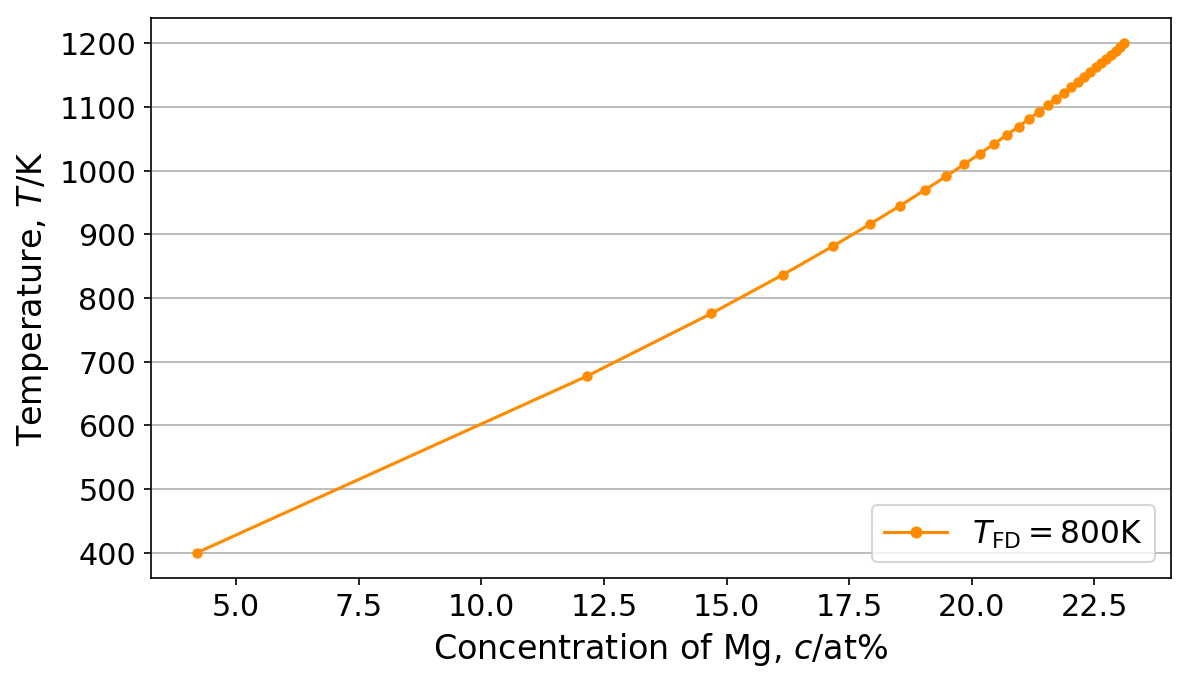

In [44]:
process(tetra.meta, dict(temp=ret.index.values, c=ret.values, label='$T_\\mathrm{FD}=800$K'))

* T=900.0 Concentration=0.1322374574878373 Counts=214